<a href="https://colab.research.google.com/github/alaa2020osama/QuoraQuestionPairNLP/blob/main/Copy_of_Quora_Questions_Pairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Quora Questions Pairs using BERT"
> "Task: Identify wether two question have similar context/meaning or not"


### Quora Questions Pairs using BERT : Overview

**Task: Identify wether two question have similar context/meaning or not**<br>
[kaggle](https://www.kaggle.com/c/quora-question-pairs/overview)
<br>
I have tried this problem using three different approach


1.   Using Naive Bayes Classifier
2.   Using BERT
3.   Using fine tuned BERT



In [2]:
## to save the model in a directory in google drive. ##
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/QuoraQuestionsPair

Mounted at /content/drive
/content/drive/MyDrive/QuoraQuestionsPair


In [3]:
import pandas as pd
import numpy as np
import os
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
path = "/content/drive/MyDrive/QuoraQuestionsPair"
##### run them once ######
#nltk.download()
#!unzip /content/drive/MyDrive/QuoraQuestionsPair/quora_question_pairs.zip
#!unzip /content/train.csv.zip


### Naive Bayes Classifier

In [4]:
#load Data
train_path = path+"/train.csv"
train = pd.read_csv(train_path)
print("Total samples:",len(train))
train.head(10)

Total samples: 404290


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [ ]:

print(train.isnull().sum(axis=0)) #dropping null values
train.dropna(axis=0,inplace=True) # do operations in place and return none


id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


#### Text Preprocessing


*   Remove stop words
*   Lemmatize 



In [ ]:
#preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
def preprocess(series):
  
    # 1- Remove characters other than alphabets & numerics
    # 2- make it small (no capital letters)
    # 3 - split the sentence into words into a list
    words = re.sub("[^A-Za-z0-9]"," ",series).lower().split() 

    # lemmatize words: lemmatization considers the context and converts the word to its meaningful base form. i.e. 'caring' --> 'care'
    lemm = WordNetLemmatizer()

    # Remove stop words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”)
    stpwords = stopwords.words('english')
    
    # take a word by word and check if it is in the stopwords or not. lemmatize the words that are not in the stop words.
    lemmitized = [lemm.lemmatize(word) for word in words if word not in stpwords]
    
    # Back to sentence: by joining the words with spaces in between
    sent = ' '.join(lemmitized)
    return sent

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
######## Clarification Example ##########
import re

series = "Welcome @mna 123alaa.// //alaa"
words = re.sub("[^A-Za-z0-9]"," ",series)
words = words.split()
print(words)

sent = ' '.join(words)
print(sent)


['Welcome', 'mna', '123alaa', 'alaa']
Welcome mna 123alaa alaa


In [ ]:
# Apply preprocessing: to have sentence lemmatized, and without any symbols or capital letters
train['question1'] =train['question1'].apply(preprocess)
train['question2'] =train['question2'].apply(preprocess)

In [ ]:
# concatenate Question 1 & Question 2
'''
def concat(ser):
    print(ser['question1'])
    return 1
'''

train['combine'] = train.apply(lambda ser: ser['question1'] + " " + ser['question2'],axis=1) 
train.head(10)

,id,qid1,qid2,question1,question2,is_duplicate,combine
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,step step guide invest share market india step...
1,1,3,4,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,0,story kohinoor koh noor diamond would happen i...
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,increase speed internet connection using vpn i...
3,3,7,8,mentally lonely solve,find remainder math 23 24 math divided 24 23,0,mentally lonely solve find remainder math 23 2...
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,one dissolve water quikly sugar salt methane c...
5,5,11,12,astrology capricorn sun cap moon cap rising say,triple capricorn sun moon ascendant capricorn say,1,astrology capricorn sun cap moon cap rising sa...
6,6,13,14,buy tiago,keep childern active far phone video game,0,buy tiago keep childern active far phone video...
7,7,15,16,good geologist,great geologist,1,good geologist great geologist
8,8,17,18,use instead,use instead,0,use instead use instead
9,9,19,20,motorola company hack charter motorolla dcx3400,hack motorola dcx3400 free internet,0,motorola company hack charter motorolla dcx340...


#### Convert Words into Vector




Term Frequency (TF)
The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency.

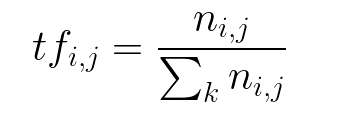

Inverse Data Frequency (IDF)
The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.

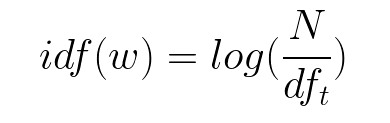

Lastly, the TF-IDF is simply the TF multiplied by IDF.

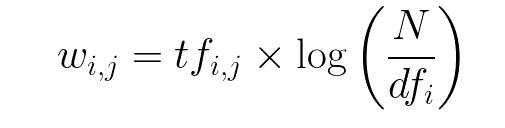

In [ ]:
# Word to Vectors using Tf-Idf: is to score the relative importance of words
# max features: if you pass, say, 5 to max_features, that would mean creating a feature matrix out of the most 5 frequent words accross text documents.
cv = TfidfVectorizer(max_features=50000) 

# Take combine questions data as X
X = cv.fit_transform(train['combine'])
y = np.array(train['is_duplicate'])
print(X.shape)

# Train - Test Spilt
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)
print(X_train.shape,X_test.shape)

(404287, 50000)
(384072, 50000) (20215, 50000)


In [ ]:
import pickle

naive_model = MultinomialNB()#Training
naive_model.fit(X_train,y_train)

# save the model to disk
filename = 'MultinomialNB_model.sav'
pickle.dump(naive_model, open(filename, 'wb'))

#Predictions
y_pred_train = naive_model.predict(X_train)
y_pred_test = naive_model.predict(X_test)

In [ ]:
 
accuracy_train = sum((y_pred_train == y_train).astype(int))/len(y_train)
accuracy_test = sum((y_pred_test == y_test).astype(int))/len(y_test)
print(accuracy_train,accuracy_test)

0.7519761919640068 0.739055157061588


We got 74% Accuracy which is very bad for binary classification problem

### BERT
I have used "Semantic Similarity with BERT" code to solve this problem.<br>
reference : https://keras.io/examples/nlp/semantic_similarity_with_bert/

In [ ]:
%cd /content/drive/MyDrive/QuoraQuestionsPair

import numpy as np
import pandas as pd
import tensorflow as tf
!pip install transformers==2.11.0
import transformers
path = "/content/drive/MyDrive/QuoraQuestionsPair"


/content/drive/MyDrive/QuoraQuestionsPair
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
max_length = 128  # Maximum length of input sentence to the model.
batch_size = 32
epochs = 2

# Labels in our dataset.
#1 : Non Duplicate
#0 : Duplicate
labels = [1,0] 

df = pd.read_csv(path+"/train.csv")
testdf = pd.read_csv(path+"/test.csv")

#### Preprocessing

In [ ]:

print(df.isnull().sum(axis=0))# Droping Null values
df.dropna(axis=0,inplace=True)

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


In [ ]:
#create mask for train-test distribution
mask = np.random.rand(len(df)) < 0.7 [0, 1,1,0,0,0,0]
train_df = df[mask] #train
not_train = df[~mask] #dev
#val_df = not_train

#create mask for val-test distribution
mask = np.random.rand(len(not_train)) < 0.5
test_df = not_train[mask]
val_df = not_train[~mask]
#test_df = testdf
val_df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
14,14,29,30,What are the laws to change your status from a...,What are the laws to change your status from a...,0
21,21,43,44,What's causing someone to be jealous?,What can I do to avoid being jealous of someone?,0
24,24,49,50,What does it mean that every time I look at th...,How many times a day do a clock’s hands overlap?,0
26,26,53,54,What is web application?,What is the web application framework?,0


In [ ]:
Should I buy tiago? What does it mean that every time I look at th.
[1, 2, 3, 4, 0, 0 , 0 , 0,0,... ]128
attention mask: [1,1,1,1,0,0,....]
token type ids: [1,1,1,1,0,0,0,0,0,0.....]
 .
 [1,2,3,4,5,6,....]128

 padding
# Shape of the data
print(f"Total train samples : {train_df.shape[0]}")
print(f"Total validation samples: {val_df.shape[0]}")
print(f"Total test samples: {test_df.shape[0]}")

Total train samples : 283148
Total validation samples: 60731
Total test samples: 60408


In [ ]:
print("Train Target Distribution")
print(train_df.is_duplicate.value_counts())

print("Validation Target Distribution")
print(val_df.is_duplicate.value_counts())

Train Target Distribution
0    178701
1    104447
Name: is_duplicate, dtype: int64
Validation Target Distribution
0    38255
1    22476
Name: is_duplicate, dtype: int64


In [ ]:

y_train = tf.keras.utils.to_categorical(train_df.is_duplicate, num_classes=2)# One hot encoding representation
print(f"y_train.shape:{y_train.shape}")

y_val = tf.keras.utils.to_categorical(val_df.is_duplicate, num_classes=2)
print(f"y_val.shape:{y_val.shape}")

y_test = tf.keras.utils.to_categorical(test_df.is_duplicate, num_classes=2)
print(f"y_test.shape:{y_test.shape}")

y_train.shape:(283148, 2)
y_val.shape:(60731, 2)
y_test.shape:(60408, 2)


#### Custom Data Generator

In [ ]:
# Tokenization is a way of separating a piece of text into smaller units called tokens.
class BertSemanticDataGenerator(tf.keras.utils.Sequence):
    """Generates batches of data.

    Args:
        sentence_pairs: Array of premise and hypothesis input sentences.
        labels: Array of labels.
        batch_size: Integer batch size.
        shuffle: boolean, whether to shuffle the data.
        include_targets: boolean, whether to incude the labels.

    Returns:
        Tuples `([input_ids, attention_mask, `token_type_ids], labels)`
        (or just `[input_ids, attention_mask, `token_type_ids]`
         if `include_targets=False`)
    """

    def __init__(
        self,
        sentence_pairs,
        labels,
        batch_size=batch_size,
        shuffle=True,
        include_targets=True,
    ):
        self.sentence_pairs = sentence_pairs
        self.labels = labels
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.include_targets = include_targets
        
        # Load our BERT Tokenizer to encode the text (get the features).
        # We will use bert-base-uncased pretrained model which is for english language and not case sensitive
        self.tokenizer = transformers.BertTokenizer.from_pretrained(
            "bert-base-uncased", do_lower_case=True
        )
        self.indexes = np.arange(len(self.sentence_pairs))
        self.on_epoch_end()

    def __len__(self):
        # Denotes the number of batches per epoch.
        return len(self.sentence_pairs) // self.batch_size

    def __getitem__(self, idx):
        # Retrieves the batch of index.
        indexes = self.indexes[idx * self.batch_size : (idx + 1) * self.batch_size] #:[0,1,2,3,4,5,6,7,8,9,,,,,32]# to take a range of numbers for each batch
        sentence_pairs = self.sentence_pairs[indexes] # to load the batch itself

        # With BERT tokenizer's batch_encode_plus batch of both the sentences are
        # encoded together and separated by [SEP] token.
        encoded = self.tokenizer.batch_encode_plus(
            sentence_pairs.tolist(),
            add_special_tokens=True,
            max_length = max_length,
            return_attention_mask=True,
            return_token_type_ids=True,
            pad_to_max_length=True,
            return_tensors="tf",
        )

        # Convert batch of encoded features to numpy array.
        input_ids = np.array(encoded["input_ids"], dtype="int32")
        attention_masks = np.array(encoded["attention_mask"], dtype="int32")
        token_type_ids = np.array(encoded["token_type_ids"], dtype="int32")

        # Set to true if data generator is used for training/validation.
        if self.include_targets:
            labels = np.array(self.labels[indexes], dtype="int32")
            return [input_ids, attention_masks, token_type_ids], labels
        else:
            return [input_ids, attention_masks, token_type_ids]

    def on_epoch_end(self):
        # Shuffle indexes after each epoch if shuffle is set to True.
        if self.shuffle:
            np.random.RandomState(42).shuffle(self.indexes)

In [ ]:
#### for illustrations #####
import transformers
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
sample_txt = 'when was i last outside? I am stuck at home for 2 weeks.'
tokens = tokenizer.tokenize(sample_txt) #:['when','was'...]

encoded = tokenizer.encode_plus(
    sample_txt,
    add_special_tokens=True,
    max_length = 32,
    return_attention_mask=True,
    return_token_type_ids=True,
    pad_to_max_length=True,
    return_tensors="tf",
)
encoded.keys()

# Convert batch of encoded features to numpy array.
input_ids = np.array(encoded["input_ids"], dtype="int32")
attention_masks = np.array(encoded["attention_mask"], dtype="int32")
token_type_ids = np.array(encoded["token_type_ids"], dtype="int32")
print(input_ids)
print(attention_masks)
print(token_type_ids)

[[ 101 2043 2001 1045 2197 2648 1029 1045 2572 5881 2012 2188 2005 1016
  3134 1012  102    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


#### Build The Model

In [ ]:
# Create the model under a distribution strategy scope.
# This strategy is typically used for training on one machine with multiple GPUs.
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    
    # Encoded token ids from BERT tokenizer.
    input_ids = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="input_ids"
    )
    
    # Attention masks indicates to the model which tokens should be attended to.
    attention_masks = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="attention_masks"
    )
    # Token type ids are binary masks identifying different sequences in the model.
    token_type_ids = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="token_type_ids"
    )
    # Loading pretrained BERT model.
    bert_model = transformers.TFBertModel.from_pretrained("bert-base-uncased")
    
    # Freeze the BERT model to reuse the pretrained features without modifying them.
    bert_model.trainable = False
    
    # Indices can be obtained using BertTokenizer. 
    sequence_output, pooled_output = bert_model(
        input_ids, attention_mask=attention_masks, token_type_ids=token_type_ids
    )
    # Add trainable layers on top of frozen layers to adapt the pretrained features on the new data.
    bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(sequence_output)
    
    # Applying hybrid pooling approach to bi_lstm sequence output.
    avg_pool = tf.keras.layers.GlobalAveragePooling1D()(bi_lstm)
    max_pool = tf.keras.layers.GlobalMaxPooling1D()(bi_lstm)
    concat = tf.keras.layers.concatenate([avg_pool, max_pool])
    dropout = tf.keras.layers.Dropout(0.3)(concat)
    output = tf.keras.layers.Dense(2, activation="softmax")(dropout)
    model = tf.keras.models.Model(
        inputs=[input_ids, attention_masks, token_type_ids], outputs=output
    )

    # To config the model with losses and metrics
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss="categorical_crossentropy",
        metrics=["acc"],
    )


print(f"Strategy: {strategy}")
model.summary()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Strategy: <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7f94fb8075d0>
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                       

#### Create train and validation data generators

In [ ]:
train_data = BertSemanticDataGenerator(
    train_df[["question1", "question2"]].values.astype("str"),
    y_train,
    batch_size=batch_size,
    shuffle=True,
)
val_data = BertSemanticDataGenerator(
    val_df[["question1", "question2"]].values.astype("str"),
    y_val,
    batch_size=batch_size,
    shuffle=False,
)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

#### Train the model
Training is done only for the top layers to perform "feature extraction", which will allow the model to use the representations of the pretrained model.

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
     use_multiprocessing=True,
    workers=-1,
)

Epoch 1/2
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
8840/8840 [==============================] - 2216s 248ms/step - loss: 0.3937 - acc: 0.8100 - val_loss: 0.3511 - val_acc: 0.8345
Epoch 2/2
8840/8840 [=

#### Fine Tuning (Optional)

Now BERT model has knowledge of Language & Context now we can unfreeze the BERT pretrained weights & retrain using very low learning rate to solve actual NLP problem

In [ ]:
bert_model.trainable = True
# Recompile the model to make the change effective.
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  ((None, 128, 768),   109482240   ['input_ids[0][0]',              
                                 (None, 768))                     'attention_masks[0][0]',  

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    use_multiprocessing=True,
    workers=-1,
)

Epoch 1/2
8840/8840 [==============================] - 4825s 544ms/step - loss: 0.2905 - accuracy: 0.8712 - val_loss: 0.2614 - val_accuracy: 0.8853
Epoch 2/2
8840/8840 [==============================] - 4790s 542ms/step - loss: 0.2173 - accuracy: 0.9088 - val_loss: 0.2409 - val_accuracy: 0.9017


In [ ]:
#model.save('BERTModel.h5')
#print('Model Saved!')
model.save_weights('gfgModelWeights')
print('Model Saved!')

Model Saved!


After Waiting of 4-5 hours now our model is trained!

#### Evaluate on Test Dataset

In [ ]:
from tensorflow.keras.models import load_model
#savedModel=load_model('BERTModel.h5')
#savedModel.summary()

# load model
savedModel = model.load_weights('gfgModelWeights')
print('Model Loaded!')

Model Loaded!


In [ ]:

test_data = BertSemanticDataGenerator(
    test_df[["question1", "question2"]].values.astype("str"),
    y_test,
    batch_size=batch_size,
    shuffle=False,
)
#model.evaluate(test_data, verbose=1)

We Got 90% Accuracy on Test Dataset which is far better than Naive Bayes

In [ ]:
def check_similarity(sentence1, sentence2):
  sentence_pairs = np.array([[str(sentence1), str(sentence2)]])
  test_data = BertSemanticDataGenerator(
      sentence_pairs, labels=None, batch_size=1, shuffle=False, include_targets=False,
  )

  proba = model.predict(test_data)[0]
  idx = np.argmax(proba)
  proba = f"{proba[idx]: .2f}%"
  pred = labels[idx]
  return pred, proba

#### Try the custom Questions

In [ ]:
import numpy as np
ind = np.random.randint(0,500) 
#Duplicate Questions
q1 = test_df[test_df["is_duplicate"] == 1].iloc[ind]['question1']
q2 = test_df[test_df["is_duplicate"] == 1].iloc[ind]['question2']
print(q1+"\n"+q2)
check_similarity(q1,q2)

How can I get rid of pimples all over my face?
What is the best way to get rid of acne?
INFO:tensorflow:Error reported to Coordinator: Layer "model_1" expects 3 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'cond/Identity:0' shape=(None, None) dtype=int32>]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/coordinator.py", line 293, in stop_on_exception
    yield
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/mirrored_run.py", line 342, in run
    self.main_result = self.main_fn(*self.main_args, **self.main_kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py", line 689, in wrapper
    return converted_call(f, args, kwargs, options=options)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py", line 377, in converted_call
    return _call_unconverted(f, args, kwargs, options)
  File "/usr/local/lib/

ValueError: ignored

In [ ]:
ind = np.random.randint(0,500)
#Non-Duplicate Questions
q1 = test_df[test_df["is_duplicate"] == 0].iloc[ind]['question1']
q2 = test_df[test_df["is_duplicate"] == 0].iloc[ind]['question2']
print(q1+"\n"+q2)
check_similarity(q1,q2)

What is the difference between a premier and authentic NHL jersey?
What is the difference between the FA Cup and the Capital One Cup?
INFO:tensorflow:Error reported to Coordinator: Layer "model" expects 3 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'cond/Identity:0' shape=(None, None) dtype=int32>]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/coordinator.py", line 293, in stop_on_exception
    yield
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/mirrored_run.py", line 342, in run
    self.main_result = self.main_fn(*self.main_args, **self.main_kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py", line 689, in wrapper
    return converted_call(f, args, kwargs, options=options)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py", line 377, in converted_call
    return _call_unconverted(f, ar

ValueError: ignored

In [ ]:
#for illustration ###
from keras.preprocessing.text import Tokenizer
text='check check fail'
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts([text])
tokenizer.word_index

{'check': 1, 'fail': 2}